In [ ]:
# Check GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Mount Drive Containing Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Preprocessing and normalizing images
from keras.preprocessing.image import ImageDataGenerator

train_path = '/content/drive/MyDrive/Skin_Datasetv2/Training'
valid_path = '/content/drive/MyDrive/Skin_Datasetv2/Testing'
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = IMAGE_SIZE,
                                            batch_size = 32,
                                            class_mode = 'categorical')

#training_set.class_indices
val_set.class_indices

Found 525 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


{'Acne': 0,
 'Actinic Keratosis': 1,
 'Basal Cell Carcinoma': 2,
 'Eczemaa': 3,
 'Rosacea': 4}

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


base_model = VGG16(weights="imagenet", include_top=False, input_shape = [224,224]+[3])
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras import layers, models, regularizers

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(12, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 32)                16416     
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 27,576,837
Trainable params: 12,862,149
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(training_set, epochs=50, validation_data=val_set, batch_size=32, callbacks=[es])

Epoch 1/50
17/17 [==============================] - 23s 881ms/step - loss: 2.2863 - accuracy: 0.2457 - val_loss: 1.5863 - val_accuracy: 0.2800
Epoch 2/50
17/17 [==============================] - 13s 762ms/step - loss: 1.5302 - accuracy: 0.3219 - val_loss: 1.5748 - val_accuracy: 0.2800
Epoch 3/50
17/17 [==============================] - 13s 780ms/step - loss: 1.4962 - accuracy: 0.3448 - val_loss: 1.5828 - val_accuracy: 0.3100
Epoch 4/50
17/17 [==============================] - 12s 729ms/step - loss: 1.4556 - accuracy: 0.3581 - val_loss: 1.5814 - val_accuracy: 0.2900
Epoch 5/50
17/17 [==============================] - 13s 738ms/step - loss: 1.4495 - accuracy: 0.3467 - val_loss: 1.5079 - val_accuracy: 0.2700
Epoch 6/50
17/17 [==============================] - 13s 738ms/step - loss: 1.4171 - accuracy: 0.3848 - val_loss: 1.5774 - val_accuracy: 0.3100
Epoch 7/50
17/17 [==============================] - 14s 820ms/step - loss: 1.3729 - accuracy: 0.3924 - val_loss: 1.5777 - val_accuracy: 0.3100

In [ ]:
loss, accuracy = model.evaluate(val_set)
print('Testing Loss:', round(loss,2))
print('Testing Accuracy:', round(accuracy*100,2),'%')


4/4 [==============================] - 1s 212ms/step - loss: 1.5828 - accuracy: 0.3100
Testing Loss: 1.58
Testing Accuracy: 31.0 %


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


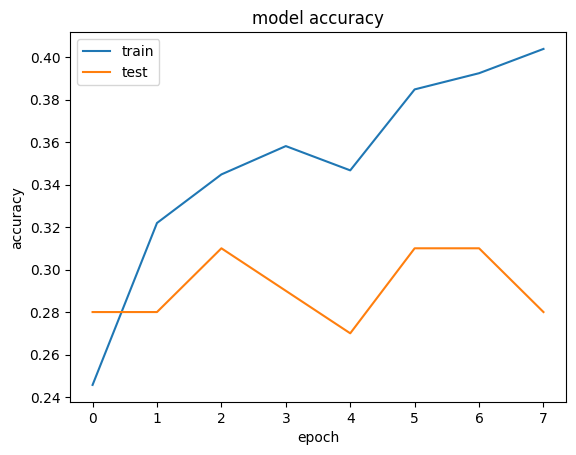

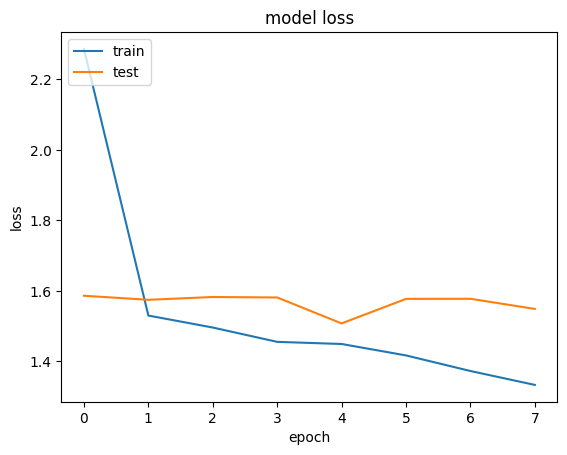

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:
from tensorflow import keras
from PIL import Image
import numpy as np

# Load the new image
img = Image.open('/content/eczema.png')

img = img.convert('RGB')
# Preprocess the image
img = img.resize((224, 224))
img = np.array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Make a prediction
predictions = model.predict(img)
class_index = np.argmax(predictions)

# Print the predicted class
print(predictions)
print(class_index)

FileNotFoundError: ignored